# Glasgow Caledonian University

School of Computing, Engineering and Built Environment

Msc in Big Data Technologies


Module : Software Development For Data Science (MMI226556-21-A)

Coursework 1 Diet 1 2021/2022

Analysing Ames Housing Dataset- Report

Prepared for : Professor Gordon Morison  (Head of Department for Computing)

Prepared by : Shantnu Aggarwal - S2146057



# **ANALYSIS OF AMES HOUSING DATASET**

Ames Housing dataset is a public dataset which contains information of sale of individual residential houses from 2006 to 2010 in Ames, Iowa. This dataset is compiled by Dean De Cock who wrote a paper on this.

The dataset is available publicly which can be accessed at http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt

This dataset was shared by the office of Ames City Assessor's office that contains the data of sales of 3970 properties with 113 variables decribing these properties from 2006 to 2010.

Later non residential and properties which were sold multiple times were removed resulting in final dataset that contains 2970 residential household properties accessed on 82 variables after removing extraneous variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) 


I will use python packages and libraries like numpy, pandas, Math for analysis of this Dataset and matplotlib and seaborn for visualization.


# **Contents**

1. Reading Public Dataset 

2. Data Formatting

3. Data Cleaning

4. Exploratory Data Analysis

5. Data Visualization

6. Conclusion

7. References

# 1. Reading Public Dataset

In this section I will read the public dataset saved in my google drive.


First of all, I will import the required packages and libraries.

In [1]:
# Import following libraries and packages for Data Analysis. 
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt
import seaborn as sns

We need to import the public dataset in our Colab notebook. I will mount the google drive from Colab Notebook which enables me to import any data from drive.

In [2]:
# Mounting google drive in google collab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I am using Pandas library to access and read the text file present in google drive.

In [5]:
#Reading dataset
ames_df = pd.read_csv('/content/drive/My Drive/data/AmesHousing.txt',sep='\t')
ames_df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,...,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,...,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,

In [10]:
#Shape of dataframe
ames_df.shape

2930

In [11]:
print('The dataframe has',ames_df.shape[0],'rows and',ames_df.shape[1],'columns' )

The dataframe has 2930 rows and 82 columns


# 1. Data Formatting

Data Formatting means to convert your dataset in the proper format on which you can do further analysis on the data. In this, I will check the names of columns and its datatypes to ensure all mathematical and analytical operations work fine on the dataset.

In [12]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

On checking the names of columns I figured out that there are spaces in names of columns which will be a issue while applying mathematical operators on that columns.

In [13]:
# Removing spaces from the column names of the dataset
ames_df.columns=ames_df.columns.str.replace(' ','')

ames_df

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,...,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,...,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.

Now all spaces are removed from column names and all columns are following Camel Case for names. Special characters like '@,#,!,%,&,^,*,/' also needs to be removed. One column contains '/' so I will remove that in next step.

In [14]:
# Remove '/' from column names
ames_df.columns= ames_df.columns.str.replace('[/]','')

I will cross verify once if spaces and special characters are removed from the dataframe.

In [15]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

Now I will check all the mathematical and statistical details of the dataset.

In [16]:
ames_df.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# 1. Data Cleaning

Data Cleaning is a process of fixing and removing the improper and unwanted data from the dataset which is necessary for further analysis and proper insight generation from the data. This includes dealing with below issues-
1. Duplicate values in the dataset.
2. Presence of Nulls, blanks and NA values in the dataset.
3. Invalid Values - Out of range values, exceptional or unusual values.
4. Data Conflicts - Contradictory or mutually exclusive data.

There are various techniques to achieve data cleansing like dropping, correcting or replacing the data with statistical operators like mean, median and mode.

For Further simplification and use of operators ordinal variables can be converted to numerical ones.
For example- True and False can be converted to 1 and 0. 



**1.**   Check number of duplicate rows in the dataframe



In [17]:
# Checking duplicates
duplicates = ames_df[ames_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Order, PID, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 82 column

There are no duplicate rows in the dataset 

**2.** Check number of nulls in each column of the dataframe


In [18]:
# Checking Nulls
ames_df_nulls=ames_df.isnull().sum().sort_values(ascending=False)
no_of_nulls = ames_df_nulls.to_string()
print(no_of_nulls)

PoolQC           2917
MiscFeature      2824
Alley            2732
Fence            2358
FireplaceQu      1422
LotFrontage       490
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageFinish      159
GarageType        157
BsmtExposure       83
BsmtFinType2       81
BsmtFinType1       80
BsmtCond           80
BsmtQual           80
MasVnrType         23
MasVnrArea         23
BsmtFullBath        2
BsmtHalfBath        2
GarageArea          1
GarageCars          1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1
Electrical          1
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
YearBuilt           0
SalePrice           0
OverallCond         0
OverallQual         0
PID                 0
MSSubClass          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope 

We can observe that there are lot of Null values in some of the columns of the dataset.

Now we will check the columns where null values are more than 40% and will remove them as those columns will not be useful in further analysis of data.

In [19]:
# Percentage of Nulls 
percn_null=(ames_df_nulls/len(ames_df))*100

null_columns= percn_null[percn_null>40]
null_columns

PoolQC         99.556314
MiscFeature    96.382253
Alley          93.242321
Fence          80.477816
FireplaceQu    48.532423
dtype: float64

I will create a bar plot to represent the amount of Null values in above columns compared to other columns having Null values

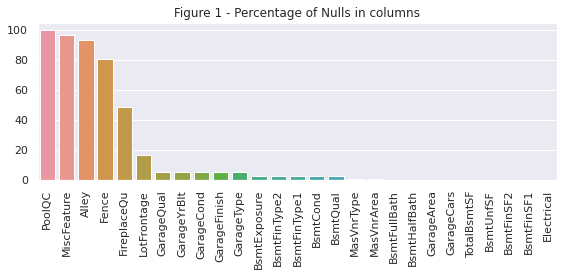

In [20]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plt.title('Figure 1 - Percentage of Nulls in columns')
sns.barplot(x=percn_null[percn_null>0].index,y=percn_null[percn_null>0].values)
plt.tight_layout()

It is clearly evident from the above graph that top 5 columns (more than 40% nulls) are of no use to us as they contain lot of nulls, so I am removing those columns from the dataframe. I will create new dataframe which is the copy of the existing dataframe for removing Null columns.

In [21]:
# creating new dataframe and removing nulls
list_of_null_columns= null_columns.index.to_list()
ames_df1= ames_df.copy()
ames_df1.drop(list_of_null_columns,axis=1,inplace=True)
ames_df1.columns

Index(['Order', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF

Now the null columns are removed from this new dataframe. Further I will use this new dataframe only.

**3.** Check None Values - We will check here for all the None values in the dataframe as None does not support mathematical operations.



In [22]:
none_series = (ames_df1 == 'None').any()
ames_df1[none_series.index[none_series]]


,MasVnrType
0,Stone
1,None
2,BrkFace
3,None
4,None
...,...
2925,None
2926,None
2927,None
2928,None


There is one column 'MasMasVnrType' having None values, now we will convert None values to Nan as it is supported by mathematical operators.

In [23]:
# Replace None Values with Np.nan
ames_df1.replace('None',np.nan,inplace=True)
ames_df1['MasVnrType']

0         Stone
1           NaN
2       BrkFace
3           NaN
4           NaN
         ...   
2925        NaN
2926        NaN
2927        NaN
2928        NaN
2929    BrkFace
Name: MasVnrType, Length: 2930, dtype: object

**4.** Check Invalid Values - For Invalid Values I will check negative values, number of zeroes and range of eligible values for various columns.

* Select numerical columns to check for negative values









In [24]:
numeric_df = ames_df1.select_dtypes('number')
numeric_df

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


Now I will find the count of total values which are less than 0. 

In [25]:
numeric_df[numeric_df <0].any().sum()

0

There are no numerical columns having negative values.

*  Check count of zeroes in each column.

In [26]:
zero_df=(numeric_df==0).sum().sort_values(ascending=False)
zero_df

PoolArea         2917
3SsnPorch        2893
LowQualFinSF     2890
MiscVal          2827
BsmtHalfBath     2753
ScreenPorch      2674
BsmtFinSF2       2578
EnclosedPorch    2471
HalfBath         1843
MasVnrArea       1748
BsmtFullBath     1707
2ndFlrSF         1678
WoodDeckSF       1526
Fireplaces       1422
OpenPorchSF      1300
BsmtFinSF1        930
BsmtUnfSF         244
GarageCars        157
GarageArea        157
TotalBsmtSF        79
FullBath           12
BedroomAbvGr        8
KitchenAbvGr        3
LotArea             0
OverallQual         0
YearBuilt           0
OverallCond         0
LotFrontage         0
PID                 0
MSSubClass          0
SalePrice           0
YearRemodAdd        0
1stFlrSF            0
GrLivArea           0
YrSold              0
TotRmsAbvGrd        0
GarageYrBlt         0
MoSold              0
Order               0
dtype: int64

We can observe that the count of zeroes in some of the columns is very high. So I will remove the columns having zeroes more than 80%.

In [27]:
percn_zero=(zero_df/len(ames_df))*100
percn_zero[percn_zero>80]

PoolArea         99.556314
3SsnPorch        98.737201
LowQualFinSF     98.634812
MiscVal          96.484642
BsmtHalfBath     93.959044
ScreenPorch      91.262799
BsmtFinSF2       87.986348
EnclosedPorch    84.334471
dtype: float64

I will graphically plot all the columns having 0 values.

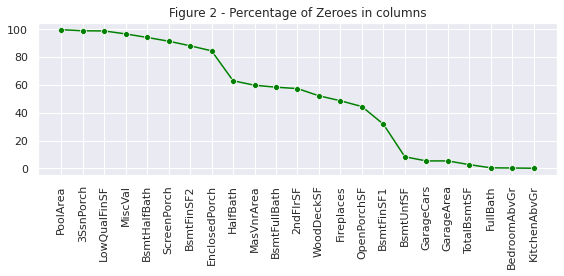

In [28]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plt.title('Figure 2 - Percentage of Zeroes in columns')
sns.lineplot(x=percn_zero[percn_zero>0].index,y=percn_zero[percn_zero>0].values,marker="o",color='green')
plt.tight_layout()

It can be seen from the above graph that top 8 values contain almost zeroes, so these columns won't be of much use in data analysis. Hence I will remove these columns.

Storing columns with more than 80% zeroes in a list.

In [29]:
list_of_zero_columns=percn_zero[percn_zero>80].index.to_list()
list_of_zero_columns

['PoolArea',
 '3SsnPorch',
 'LowQualFinSF',
 'MiscVal',
 'BsmtHalfBath',
 'ScreenPorch',
 'BsmtFinSF2',
 'EnclosedPorch']

To remove these columns from the datframe I will again create a copy of the existing dataframe and remove data from that so to make previous dataframe unaffected.

In [30]:
# Remove columns with more than 80% zeroes
ames_df2 = ames_df1.copy()
ames_df2.drop(list_of_zero_columns,axis=1,inplace=True)
ames_df2

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,1656,1.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,270.0,882.0,GasA,TA,Y,SBrkr,896,0,896,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,1329,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,2110,1.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,1629,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,1003,1.0,1,0,3,1,TA,6,Typ,0,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,239.0,864.0,GasA,TA,Y,SBrkr,902,0,902,1.0,1,0,2,1,TA,5,Typ,0,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,575.0,912.0,GasA,TA,Y,SBrkr,970,0,970,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,1389,1.0,1,0,2,1,TA,6,Typ,1,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,4,2006,WD,Normal,170000


I will further use this new dataframe only.

Now as per suggestions from the author I will check the houses having exceptional living area from the dataset

In [31]:
ames_df2['GrLivArea'].sort_values(ascending=False)


1498    5642
2180    5095
2181    4676
1760    4476
1767    4316
        ... 
2653     492
2880     480
907      438
1302     407
1901     334
Name: GrLivArea, Length: 2930, dtype: int64

It can be observed from the above result that houses greater than 4000 square feet are still present in the dataset. Now I will confirm if there any issues with these values by plotting a scatter plot between GrLivArea and Sale price.

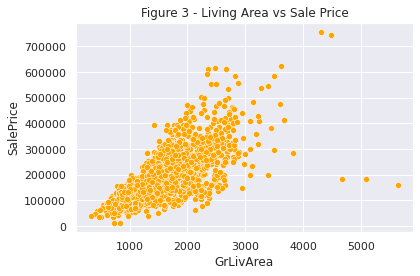

In [32]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=ames_df2['GrLivArea'],y=ames_df2['SalePrice'],color='orange')
plt.title('Figure 3 - Living Area vs Sale Price')
plt.tight_layout()

It is clearly evident that there are 5 values that are inappropriate for analysis of the dataset. Three are true outliers and two were sold at exceptionally high prices. So I will remove these values from the dataset.

In [33]:
# Drop columns where living area is more than 4000 square feet
large_houses =ames_df2[ames_df2['GrLivArea']>4000]['GrLivArea']
ames_df3= ames_df2.copy()
ames_df3.drop(large_houses.index, inplace=True)


Rows are dropped and from now I will use the new dataframe created as a copy of the existing one - ames_df3.

Let's cross verify if values are dropped or not.

In [34]:
ames_df3['GrLivArea'].sort_values(ascending=False)


1497    3820
2737    3672
2445    3627
2666    3608
2450    3500
        ... 
2653     492
2880     480
907      438
1302     407
1901     334
Name: GrLivArea, Length: 2925, dtype: int64

*   Out of range Values - I will check year built and year sold columns, if the values are valid or not. This dataset is for the houses sold between 2006 to 2010.




In [35]:
year_df = ames_df3['YearBuilt'].sort_values(ascending=False)
year_df

104     2010
252     2010
17      2010
99      2009
241     2009
        ... 
1995    1880
806     1880
1997    1879
215     1875
1318    1872
Name: YearBuilt, Length: 2925, dtype: int64

The data seems proper as there is no house data built after 2010. NowI will check the year in which house is sold.

In [36]:
year_df = ames_df3['YrSold'].sort_values(ascending=False)
year_df

0       2010
224     2010
232     2010
231     2010
230     2010
        ... 
2512    2006
2513    2006
2514    2006
2515    2006
2929    2006
Name: YrSold, Length: 2925, dtype: int64

This data is also proper as no house is being sold before 2006 and after 2010 is present in this dataset.

Now we will see if we can replace some of the categorical columns of the dataset to numerical values.

I have identified some of the columns which have common values and can be easily replaced by numerical values. Column names are GarageCond, GarageQual,KitchenQual, HeatingQC, BsmtCond, BsmtQual, ExterCond, ExterQual  and common values are : 


*   Ex	Excellent             - 1
*   Gd	Good                  - 2
*   TA	Average/Typical       - 3
*   Fa	Fair                  - 4
*   NA	No Pool               - 0





In [37]:
vars = ['GarageCond','GarageQual','KitchenQual','HeatingQC','BsmtCond','BsmtQual','ExterCond','ExterQual']
for x in vars:
  ames_df3[x] = ames_df3[x].replace({"NA":0,np.nan:0,"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5,})

In [38]:
vars2 = ['BsmtFinType1','BsmtFinType2']
for x in vars2:
  ames_df3[x] = ames_df3[x].replace({"NA":0,"GLQ":1,"ALQ":2,"BLQ":3,"Rec":4,"LwQ":5,"Unf":6})

In [39]:
ames_df3[['GarageCond','GarageQual','KitchenQual','HeatingQC','BsmtCond','BsmtQual','ExterCond','ExterQual','BsmtFinType1','BsmtFinType2']]

,GarageCond,GarageQual,KitchenQual,HeatingQC,BsmtCond,BsmtQual,ExterCond,ExterQual,BsmtFinType1,BsmtFinType2
0,3,3,3,4,2,3,3,3,3.0,6.0
1,3,3,3,3,3,3,3,3,4.0,5.0
2,3,3,2,3,3,3,3,3,2.0,6.0
3,3,3,1,1,3,3,3,2,2.0,6.0
4,3,3,3,2,3,2,3,3,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...
2925,3,3,3,3,3,3,3,3,1.0,6.0
2926,3,3,3,3,3,2,3,3,3.0,2.0
2927,0,0,3,3,3,2,3,3,1.0,6.0
2928,3,3,3,2,3,2,3,3,2.0,5.0


Now we need to replace the Null and Nan values with mean, median or mode depending upon the condition of the dataset.

For Categorical columns mode is preferred as a way to replace Null or Nan values.

For Numerical columns we have to analyse the dataset and check skewness of the dataset. Skewness refers to the deflection of values from the overall plot.

In [40]:
# Grid of distribution plots of all numerical features to check if they are skewed
num_features = ames_df2.select_dtypes('number').columns
ames_df3[num_features].skew(axis = 0)

Order            0.002058
PID              0.056667
MSSubClass       1.356549
LotFrontage      1.111071
LotArea         13.200004
OverallQual      0.171657
OverallCond      0.572769
YearBuilt       -0.602475
YearRemodAdd    -0.449567
MasVnrArea       2.565458
BsmtFinSF1       0.821985
BsmtUnfSF        0.925021
TotalBsmtSF      0.399079
1stFlrSF         0.942615
2ndFlrSF         0.847517
GrLivArea        0.878879
BsmtFullBath     0.615553
FullBath         0.164954
HalfBath         0.702966
BedroomAbvGr     0.306912
KitchenAbvGr     4.309573
TotRmsAbvGrd     0.704992
Fireplaces       0.732312
GarageYrBlt     -0.382039
GarageCars      -0.219734
GarageArea       0.213681
WoodDeckSF       1.848286
OpenPorchSF      2.495162
MoSold           0.195773
YrSold           0.132843
SalePrice        1.591072
dtype: float64

Out of the above numerical columns I will take some main variables which play a decisive factor in deciding the price of the house and check how much the values are differing from the overall pattern

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


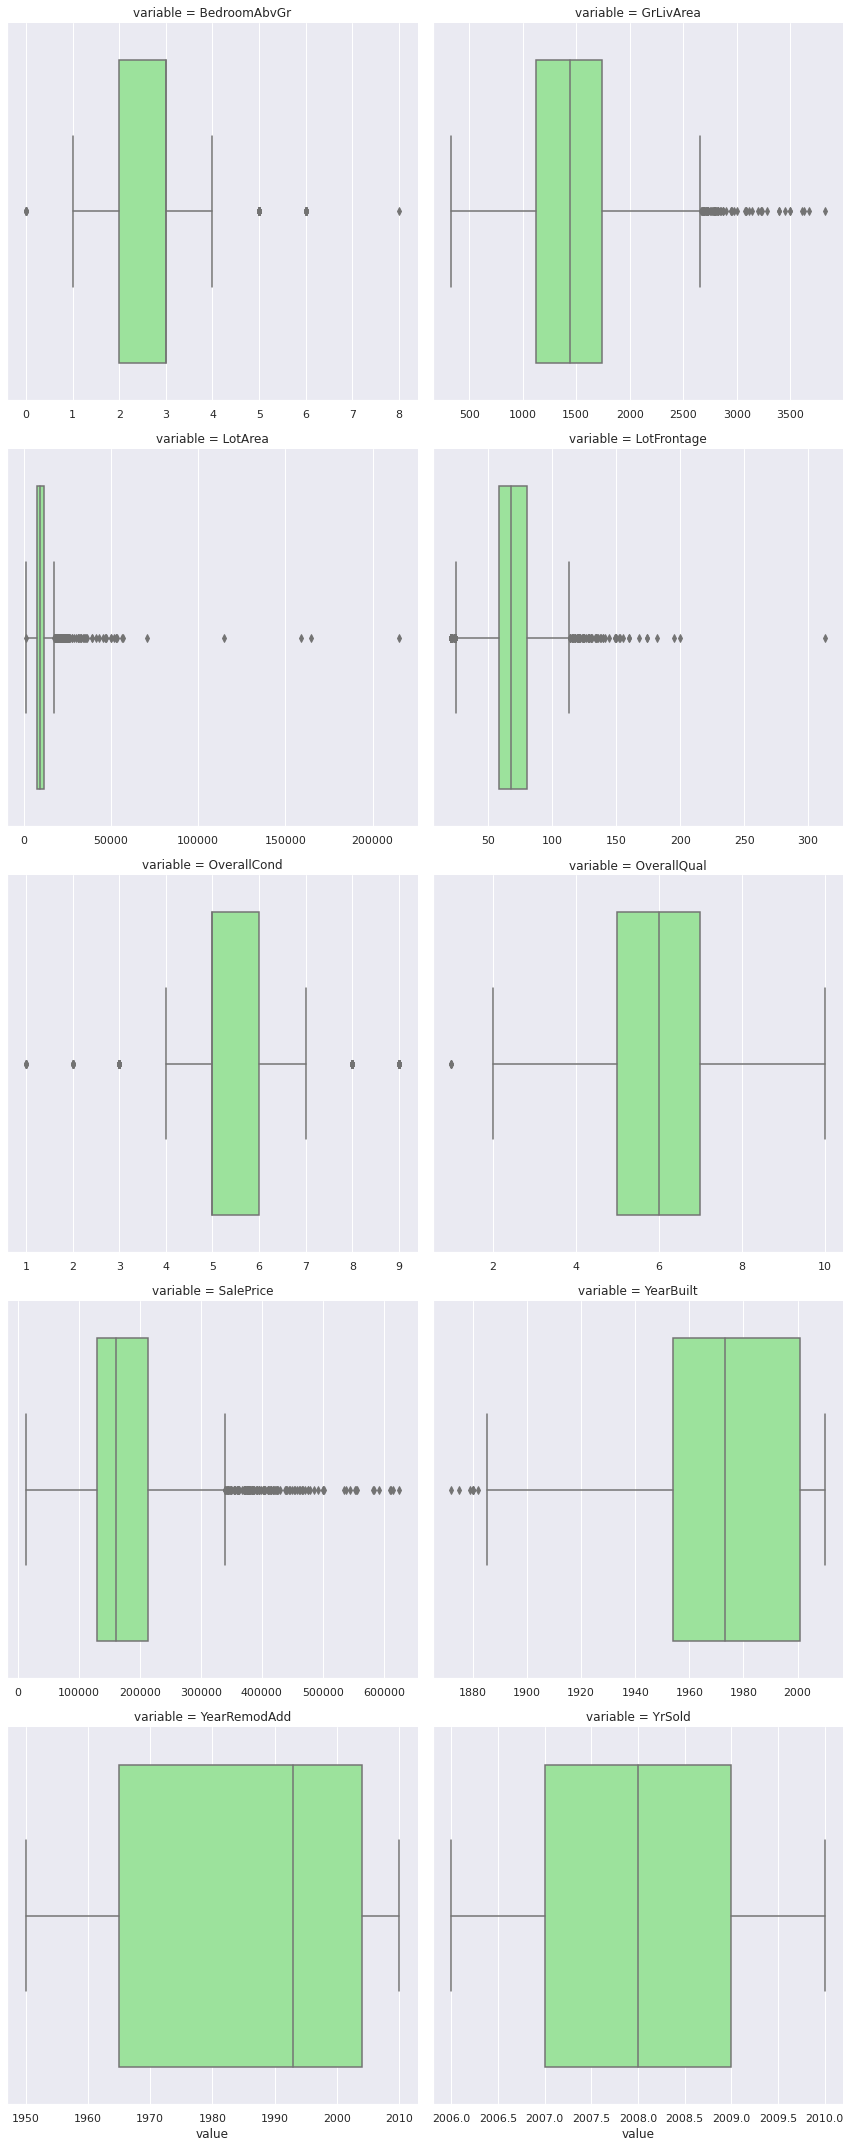

In [41]:
sns.set_theme(style="darkgrid")
sel_cols = ames_df3[['LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','GrLivArea','YrSold','SalePrice','OverallCond','BedroomAbvGr']]
multiple_df = pd.melt(ames_df3, value_vars=sorted(sel_cols))
sea = sns.FacetGrid(multiple_df,col='variable',size=6,col_wrap=2,sharex=False, sharey=False)
graph = sea.map(sns.boxplot,'value',color='lightgreen')

We can see that there are many outliers as shown in the above graph.

1. BedroomAbvGr - Most of the dataset contains 2 to 4 rooms but some values with 0 rooms and more than 6 rooms is there which is unusual and are considered as outliers.
2. GrLivArea/LotArea/LotFrontage - For these dimensional variables most of the  outliers are towards the higher end . Many houses are having exceptionally high living area, frontage and plat area.
3. OverallCond/OverallQual - We can observe the outliers on both lower and upper end.
4. YearBuilt/YearRemodAdd/YrSold - There are not many outliers but there are high and low values distributed. 

Seeing the above graphs we can anlayse that there are outliers in most of the numerical columns so the best way to handle the null and nan values is to replace them with the median of the data.

In [42]:
med_val=0
for column in ames_df3.select_dtypes('number'):
 med_val = ames_df3[column].median() 
 ames_df3[column] = ames_df3[column].fillna(med_val)
 med_val=0

Replacing the categorical columns with most frequently occured value in a particular column. We will implement this using mode().

In [43]:
for column in ames_df3.select_dtypes('object'):
 ames_df3[column] = ames_df3[column].fillna(ames_df3[column].mode()[0])

# 3. Exploratory Data Analysis and Visualization

In Exploratory data analysis, we will explore different variables in the dataset and see their relations with each other. Based on these relations we will visualize the data with the help of python visual packages and libraries. I will use matplotlib and seaborn here for plotting various types of graphs for showing the patterns in data.

While buying a home what all factors/variables do a person look for will help us in understanding the relation between the variables.

Location, Built Area, Living Area, House Frontage, Roof Style, Age of property, Street, House Architecture, No of bedrooms, bathrooms, kitchen, garage, basement, Neighbourhood etc. Based on these factors I will look for the useful columns from the dataset in price recommendation.  

Firstly, I will find the count of houses in each Neighborhood.

In [44]:
ames_df3['Neighborhood'].groupby(ames_df3.Neighborhood).agg('count').sort_values(ascending=False)

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

Now I will present this table visually as a horizontal bar plot.

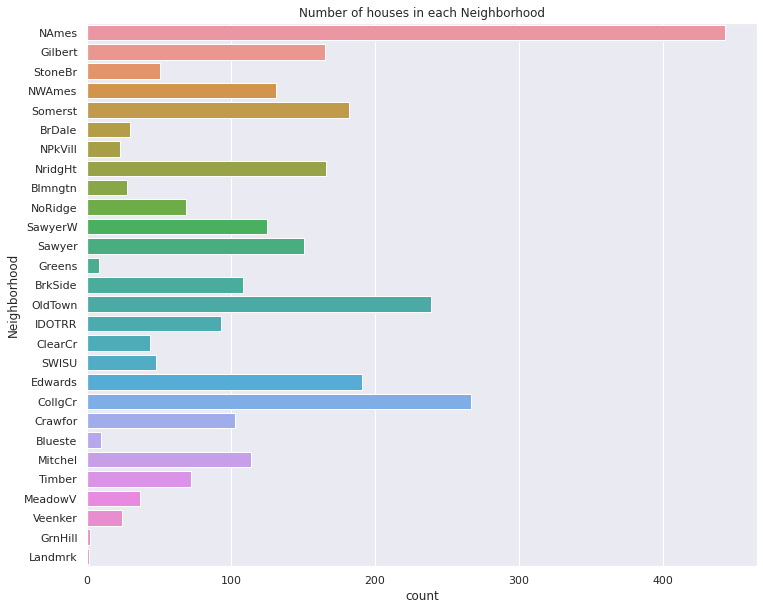

In [45]:
fig,ax = plt.subplots()
fig.set_size_inches(12, 10)

sns.countplot(y=ames_df3['Neighborhood'])
plt.title('Number of houses in each Neighborhood')
plt.show()

**Observation:** Most of the houses are present in Names Neighborhood and least houses are there in Landmrk area.

In [46]:
print('As per the dataset Names is having',ames_df3.groupby(['Neighborhood']).count()['PID'].max(),'houses and Landmrk is having',ames_df3.groupby(['Neighborhood']).count()['PID'].min(),'houses. The average number of houses in a Neighborhood is',ames_df3.groupby(['Neighborhood']).count()['PID'].mean(),'houses')

As per the dataset Names is having 443 houses and Landmrk is having 1 houses. The average number of houses in a Neighborhood is 104.46428571428571 houses


Now I will plot the relation between Neighbourhood and SalePrices in that Neighborhood.

In [47]:
visual_df = ames_df3[['Neighborhood','SalePrice']].sort_values('SalePrice',ascending=False)
visual_df

,Neighborhood,SalePrice
2445,NoRidge,625000
1063,NridgHt,615000
44,NridgHt,611657
432,NridgHt,610000
1637,StoneBr,591587
...,...,...
2880,IDOTRR,35311
2843,Edwards,35000
726,IDOTRR,34900
1553,IDOTRR,13100


The graph between the Neighborhood and Sale Price will tells us  about the Neighborhood having costlier and cheaper houses.

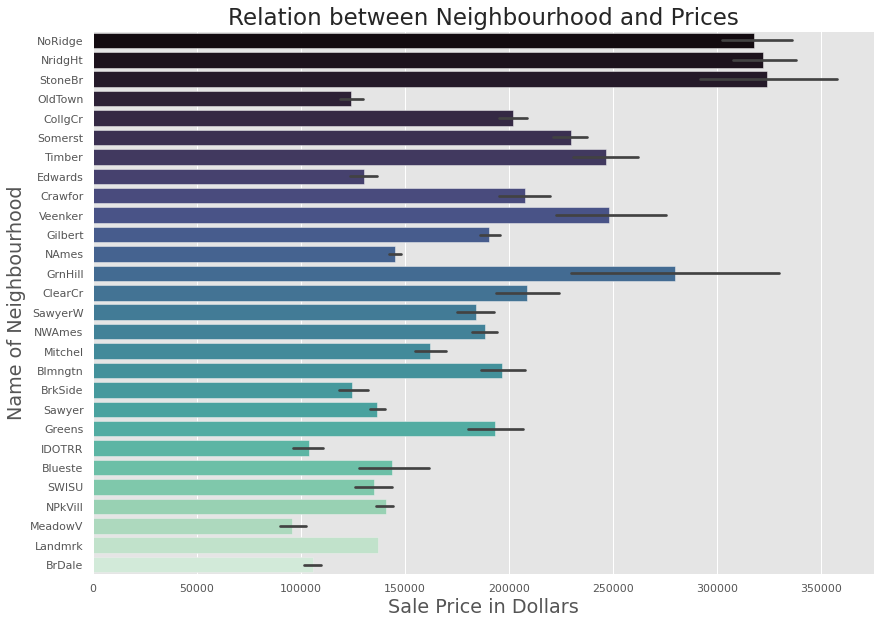

In [48]:
import matplotlib as mpl
plt.style.use('ggplot')
plt.figure(figsize=(14,10))
mpl.rcParams['font.size']=16
sns.barplot(y='Neighborhood',x='SalePrice',palette="mako",data=visual_df)
plt.title('Relation between Neighbourhood and Prices')
plt.xlabel('Sale Price in Dollars')
plt.ylabel('Name of Neighbourhood')
plt.show()

**Observation :** On an average StoneBr is the costliest place with 51 houses and BrDale is the cheapest place with only 30 houses.

Now let's see the prices of houses as per the road access to the house. First we will check the number of houses on each street and then visualize it graphically.

In [49]:
ames_df3['Street'].groupby(ames_df3.Street).agg('count')

Street
Grvl      12
Pave    2913
Name: Street, dtype: int64

Now let's visualize this

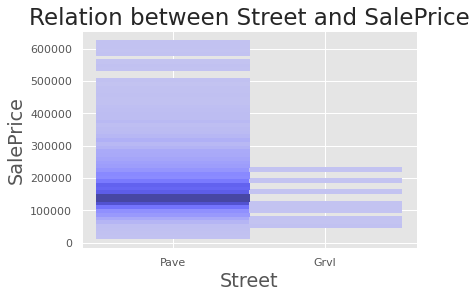

In [50]:
sns.histplot(x=ames_df3['Street'],y=ames_df3['SalePrice'],color='blue')
plt.title('Relation between Street and SalePrice')
plt.show()

**Observation :** Most of the houses are there on Pave Street and very few houses are there in Grvl Street.

Now I will try to combine Neighborhood and Street with Sale Price and see how the graph will be

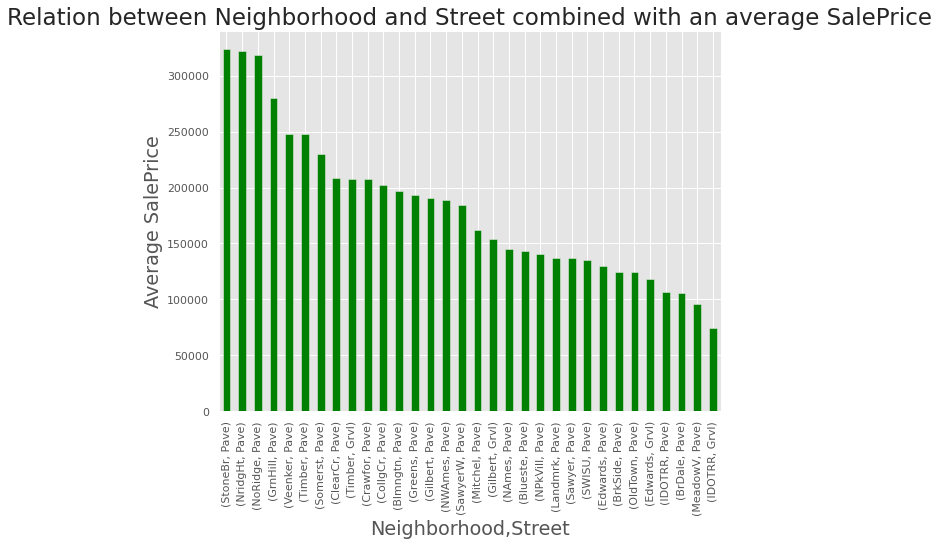

In [51]:
ames_df3.groupby(['Neighborhood','Street']).SalePrice.mean().sort_values(ascending=False).plot(kind='bar', figsize=(9,7), color='green')
plt.xticks(rotation=90)
plt.ylabel('Average SalePrice');
plt.title('Relation between Neighborhood and Street combined with an average SalePrice')
plt.show()

**Observation :** StoneBr Neighborhood on Pave Street is having the maximum sale price of houses on an average IDOTRR on Gravel Street as the lowest sale price on average.



Now let's check the sale price of houses. The maximum, minimum and an average sale value of houses in Ames at the time of 2006 to 2010.

In [52]:
print ('The minimum sale price of the house is',ames_df3['SalePrice'].min(),
       'square feet while maximum sale price is', ames_df3['SalePrice'].max(),
       'square feet. The average sale price of the house is',ames_df3['SalePrice'].mean(),'square feet.')

The minimum sale price of the house is 12789 square feet while maximum sale price is 625000 square feet. The average sale price of the house is 180411.5747008547 square feet.


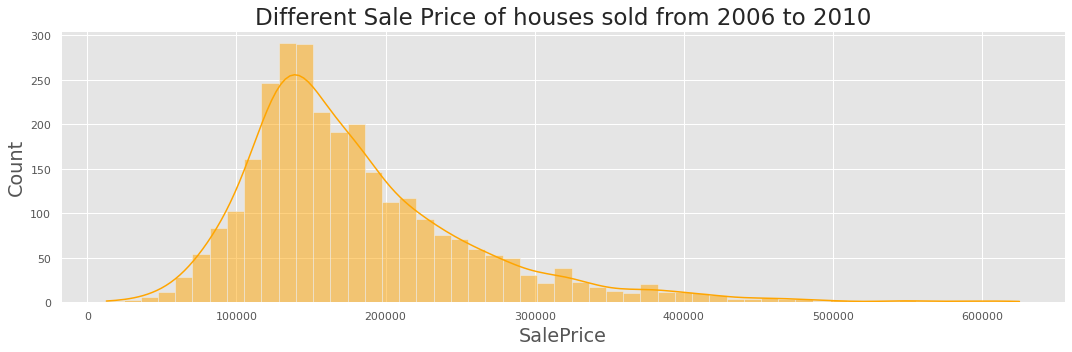

In [53]:
fig,ax = plt.subplots()
fig.set_size_inches(18, 5)
sns.histplot(ames_df3['SalePrice'],color='orange',kde=True)
plt.title('Different Sale Price of houses sold from 2006 to 2010')
plt.show()

**bservation :** It can be observed from the above graph that most of the houses were sold in the range of 100000 to 300000 dollars during the period of 2006 to 2010.

Now I will check the number of houses sold each year.

In [54]:
ames_df3['YrSold'].groupby(ames_df3.YrSold).agg('count')

YrSold
2006    625
2007    690
2008    621
2009    648
2010    341
Name: YrSold, dtype: int64

Now I will graphically depict the Number of houses sold in each year.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


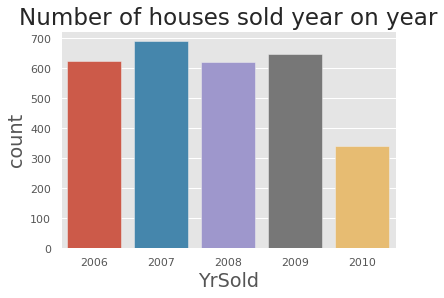

In [55]:
sns.countplot(ames_df3['YrSold'])
plt.title("Number of houses sold year on year")
plt.show()

Observation: Maximum sale of houses is in 2007 and minimum were sold in 2010.

Now we will check year on year change in SalePrice of houses.

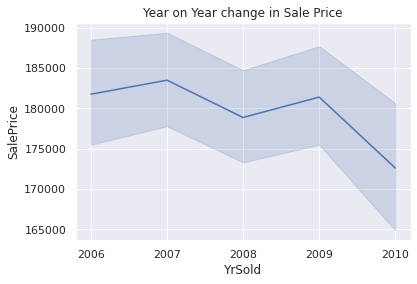

In [56]:
visual_df1 = ames_df3[['YrSold','SalePrice']].sort_values('YrSold',ascending=True)
sns.set_theme(style="darkgrid")
ax= sns.lineplot(x='YrSold',y='SalePrice',data=visual_df1)
ax.locator_params(integer=True)
plt.title('Year on Year change in Sale Price')
plt.show()

**Observation :** We can observe that SalePrice increased from 2006 and went to maximum price, then start decreasing in 2008 followed by an increase in 2009 and finally dropped to the lowest level in 2010.

Now I will do some analysis based on the size of the residential plot. I will find out the maximum and minimum size of the plots and then calculate the average size of plots. Then I will graphically represent Plot area with Sale Price.




In [57]:
# Max, Min and Avg plot areas of dataset
print('The plot area in Ames housing dataset is from',ames_df3['LotArea'].min(),'to',ames_df3['LotArea'].max(),'square feet.')
print('And the average plot area is',ames_df3['LotArea'].mean(),'square feet.')

The plot area in Ames housing dataset is from 1300 to 215245 square feet.
And the average plot area is 10103.58358974359 square feet.


Now I will make the graph of Plot area depicting the size of plots in Ames. I am taking the upper limit of house size for plotting as 22000 square feet as there are very few houses bigger than this value.

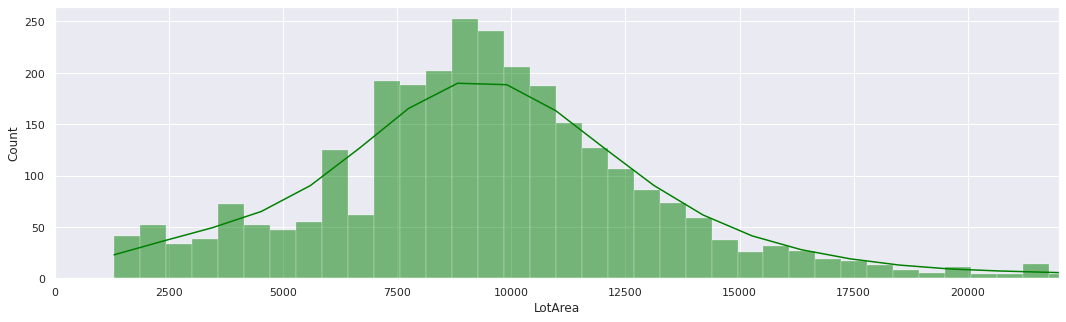

In [58]:
fig,ax = plt.subplots()
fig.set_size_inches(18, 5)

sns.histplot(ames_df3['LotArea'],color='green',kde=True)
plt.xlim(0,22000)
plt.show()

**Observation :** It can be observed that in the range of 7500 to 12500 square feet most of the houses which were sold in Ames from 2006 to 2010 will be covered. 

Now let's see the relation between Plot Area and SalePrice

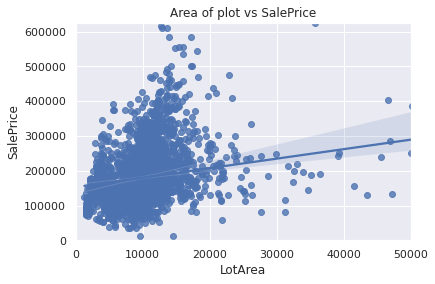

In [59]:
visual_df2 = ames_df3[['LotArea','SalePrice']].sort_values('SalePrice',ascending=False)
sns.regplot(x='LotArea',y='SalePrice',data=visual_df2)
plt.title('Area of plot vs SalePrice')
plt.ylim(0,625000)
plt.xlim(0,50000)
plt.show()

**Observation :** It can be observed that most of the houses are of 2000 to 20000 square feet and maximum of them were sold in the range of 100000 to 300000 dollars.

Now I will observe the relationship between Overall Quality and Sale Price of the house.

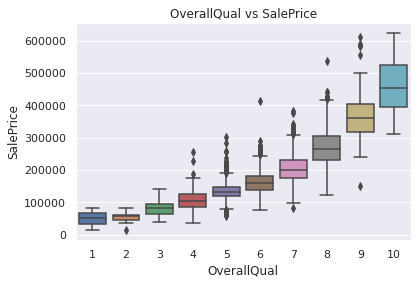

In [60]:
visual_df3 = ames_df3[['OverallQual','SalePrice']].sort_values('OverallQual',ascending=True)

sns.boxplot(x='OverallQual',y='SalePrice',data=visual_df3)
plt.title('OverallQual vs SalePrice')
plt.show()

**Observation:** It is very simple plot which says as quality increasing sale price of houses increasing. However there are some houses sold at comparatively high prices like houses with overall quality marking as 5,6,8 and 9. 

Now I will check relation of price of houses with no of bedrooms present in house.

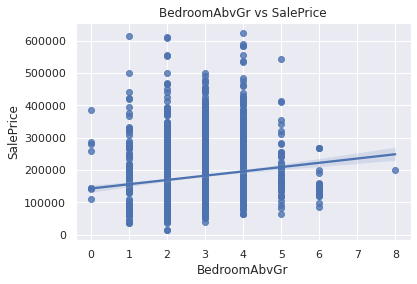

In [61]:
visual_df4 = ames_df3[['BedroomAbvGr','SalePrice']].sort_values('SalePrice', ascending=False)
sns.regplot(x='BedroomAbvGr',y='SalePrice',data=visual_df4)
plt.title('BedroomAbvGr vs SalePrice')
plt.show()

**Observation :** Houses with Bedrooms 1 to 4 were more in demand and the average sale price of these houses in comparatively higher.

Let's see the comparison of price of house with Living Area.

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:608: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


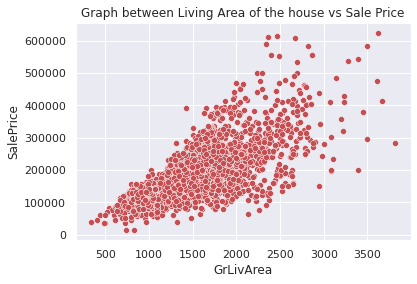

In [62]:
sns.scatterplot(x=ames_df3['GrLivArea'],y=ames_df3['SalePrice'],color='R')
plt.title('Graph between Living Area of the house vs Sale Price')
plt.show()

**Observation :** Majority of the houses are having 1000 to 2500 square feet of living area. Their Price increases as living area increases. Price range is 100000 to 300000 dollars for most of them.

Let's just see that which Neighbourhood developed earlier than others.

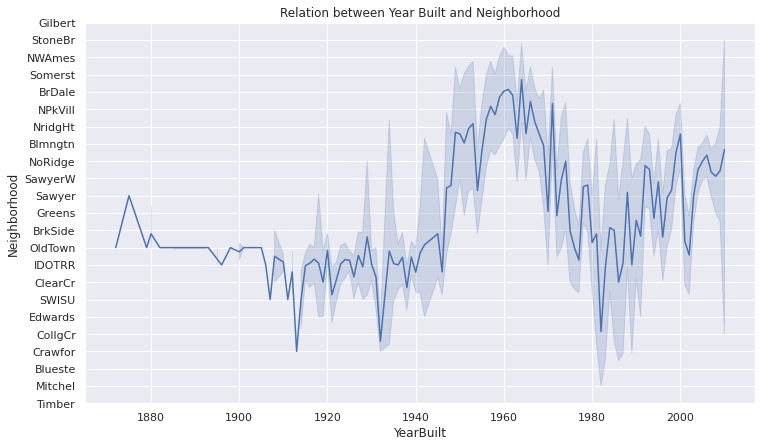

In [63]:
plt.figure(figsize=(12,7))
sns.lineplot(y=ames_df3['Neighborhood'],x=ames_df3['YearBuilt'])
plt.title('Relation between Year Built and Neighborhood')
plt.show()

**Observation :** It is evident that initially around 1900 houses start building in areas such as OldTown, BrkSide, Greens and Sawyer,SWISU but not many houses were built. After 1940s there is a steep increase in the number of houses spread to areas like NoRidge, Blmgtn, BrDale, NridgHt etc. This started decreasing in 1980s followed by an increase during 1990s and 2000s

How Roof Style got changed during the years and modifications were done ?

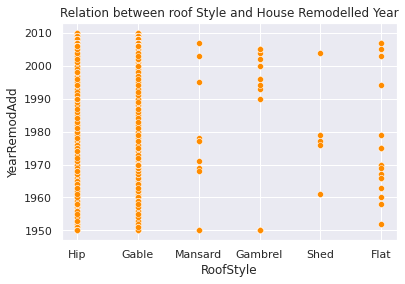

In [64]:
sns.scatterplot(x=ames_df3['RoofStyle'],y=ames_df3['YearRemodAdd'].sort_values(ascending=False),color='darkorange')
plt.ylim=(1960,2010)
plt.title('Relation between roof Style and House Remodelled Year')
plt.show()

**Observation :** Most of the houses prefer Hip and Gable type of roofs from ancient days till present. Shed type of roof is used in least number of houses.

Let's see how living area of houses changed during the period.

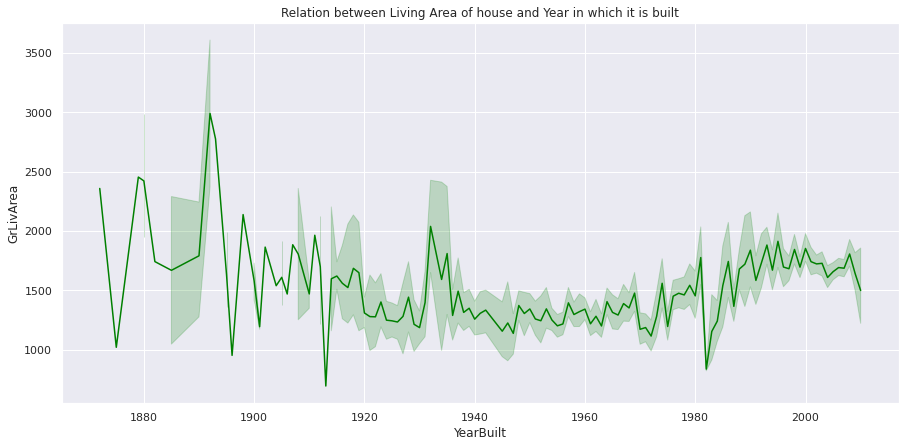

In [65]:
plt.figure(figsize=(15,7))
sns.lineplot(y=ames_df3['GrLivArea'],x=ames_df3['YearBuilt'],color='green')
plt.title('Relation between Living Area of house and Year in which it is built')
plt.show()

**Observation :** It can be observed that before 1900s houses were built with more living area which is upto 2500 to 3000 square feet. Later during 1900s it reduced to an average of 1000 to 1500 square feet. It reduced suddenly during 1980s but bounce back increasing the average living area of houses to 1500 to 2000 square feet.

Relation of External Variables with Sale Price.

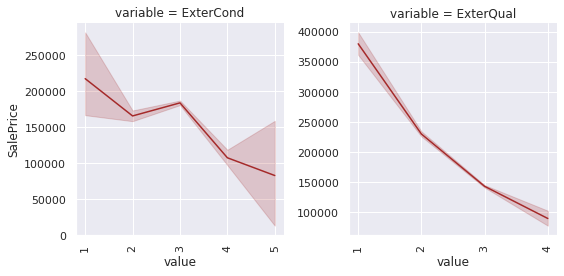

In [66]:
extern_df = ames_df3[['ExterQual','ExterCond']].columns

var_df = pd.melt(ames_df3, id_vars=['SalePrice'], value_vars=sorted(extern_df))
g = sns.FacetGrid(var_df, col='variable', col_wrap=2, sharex=False, sharey=False, height=4)
g = g.map(sns.lineplot, 'value', 'SalePrice',color='brown')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

**Observation :** As per our replaced variables 1 is excellent and followed by 2, 3, 4 for decreasing quality.It can be observed clearly that more is the external quality more is the sale price of the house. In case of external condition there is a sharp increase of sale price for condition 3 which is the average condition of the house. It means people are ready to give some more prices if they are getting an average condition house as most of the buyers are in this zone and this sale price range only. 

Let's check the overall quality parameters along with sale price on a common graph.

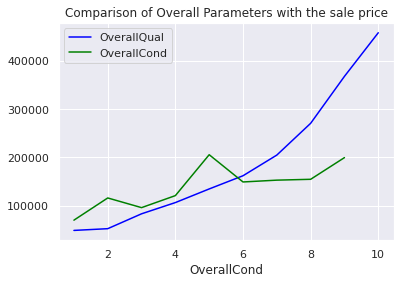

In [67]:
comb_graph=ames_df3.groupby(['OverallQual'])['SalePrice'].mean()
comb_graph.plot(color='blue',legend=1,label='OverallQual');

comb_graph=ames_df3.groupby(['OverallCond'])['SalePrice'].mean()
comb_graph.plot(color='green',legend=1,label='OverallCond',title='Comparison of Overall Parameters with the sale price');


**Observation :** It can be observed that Overall quality graph is simple. As quality increases price of house increases.In overall cond between 4 to 6 i.e. below average to average most of the buyers lie and are ready to pay some more amount for the house.

# **CONCLUSION**

There are many conclusions taken from the analysis and visualization of this dataset which are as follows-

1. Most of the houses sold in Ames, Iowa during 2006 to 2010 were of the size within the range 7500 to 12500 square feet and of price range 100000 to 300000 dollars.
2. The average sale price of houses from 2006 to 2010 in Ames, Iowa is 180000 dollars with an average size of 10000 square feet. 
3. Maximum number of houses are sold during 2007 and minimum were sold in 2010. This may be due to 2008 Global recession after which market crashed and buyers were out of the market for a time.
4. Maximum number of houses are having 1 to 4 bedrooms with Hip and Gravel type of roof.
5. Initially large houses upto 3000 square feet were popular before 1900s. During industrialization in 1900s average size of houses decreased to 1000 to 1500 square feet which after development increased to 1500 to 2000 square feet after 1980s.
6. Majority of houses were built during 1960s during industrialization era and after development.
7. External Quality and Overall Quality are the best factors to judge the sale price of the house. Factors like External Condition and Overall Condition followed them.
8. Majority houses had living area of 1000 to 2500 square feet sold in the range of 100000 to 300000 dollars.

These inferences will be useful for the stakeholders like housing authority, real-estate companies and investors who are looking for a good return on property in that Area. Based on the inferences they can easily decide the future action on the property in that area.



# **REFERENCES**

1. Kaggle.com. 2021. Exploratory Data Analysis of Housing in Ames, Iowa. [online] Available at: <https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa> [Accessed 3 December 2021].
2. Medium. 2021. Quantitative Data Exploration for Regression in Python (Ames Housing Dataset). [online] Available at: <https://medium.com/@hjhuney/quantitative-data-exploration-for-regression-in-python-ames-housing-part-1-25879dd4cc4a> [Accessed 3 December 2021].
3. GitHub. 2021. Analysis-and-Prediction-of-Home-Prices/2_TESTING_DataSet_Cleaning.ipynb at master · vgiannotta/Analysis-and-Prediction-of-Home-Prices. [online] Available at: <https://github.com/vgiannotta/Analysis-and-Prediction-of-Home-Prices/blob/master/2_TESTING_DataSet_Cleaning.ipynb> [Accessed 3 December 2021].
4. Jovian.ai. 2021. danycg85/student-perfere-a-university - Jovian. [online] Available at: <https://jovian.ai/danycg85/student-perfere-a-university> [Accessed 3 December 2021].
5. Medium. 2021. Cracking the Ames Housing Dataset with Linear Regression. [online] Available at: <https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96> [Accessed 3 December 2021].
6. Kaggle.com. 2021. Ames Housing Regression. [online] Available at: <https://www.kaggle.com/mchatham/ames-housing-regression> [Accessed 3 December 2021].

